# Integration exercises

1. Fackler and Miranda exercise 5.1: Demand for a commodity is given by $q(p)=2p^{-0.5}$. The price of the good falls from 4 to 1. Compute the change in consumer surplus **analytically** using calculus and **numerically** using three different methods: a Gauss-Legendre rule, Monte-Carlo, and Quasi Monte Carlo.

    1. Start out by plotting the demand function. In that plot, label the axis properly ($p$ on the $x$ axis), and add 2 horizontal lines for the equilibrium quantities at both prices $p=1,p=4$. This should help you visualize the consumer surplus, and it should guide you in the analytical solution. The simplest way to solve this first part would be to edit this `IJulia` notebook, just adding a code cell below (for the plot), and then one for the analytic solution. You can get and see how to use `IJulia` [by clicking on this link](https://github.com/JuliaLang/IJulia.jl).
    1. To implement the integration rules, write 3 functions, one for each sub question, and detailed below. Let each function take as argument the number of integration points. Use $n=10,100,1000$ points. Each of those functions should produce the result (of course), as well as a plot where we can see integration nodes vs function value. We want to get an idea where each method places the points, and how this might influence the different results. Ideally, the result would tell us how far the corresponding method is away from your analytic solution. *Ideally*, your plot would show us all the results at once, so we can easily compare across methods.
        1. Gauss-legendre rule. Note that you have to change the function domain to $[-1,1]$ first. This is achieved with the following transformation
    $$ \int_a^b f(x)\,dx = \frac{b-a}{2} \int_{-1}^1 f\left(\frac{b-a}{2}x + \frac{a+b}{2}\right)dx $$
        1. monte-carlo, again taking $n$ as an argument.
        1. pseudo monte-carlo. Use a Sobol Sequence.


2. Fackler and Miranda exercise 5.5: A government stabilizes the supply of a commodity at $S=2$, but allows the price to be determined on the market. Domestic and export demand for the commodity are given by $D = \tilde{\theta_1} p^{-1}, X = \tilde{\theta_2} p^{-0.5}$, and where $\log \tilde{\theta_1}$ and $\log \tilde{\theta_1}$ are both normally distributed with means 0, variances 0.02 and 0.01 respectively, and covariance 0.01.

    1. compute the expected price $E[p]$ and expected variance $V[p]$ using a kronecker product rule with gauss-hermite grids (10) in each dimension of the shock.
    1. perform the same computation with a monte carlo integration scheme.


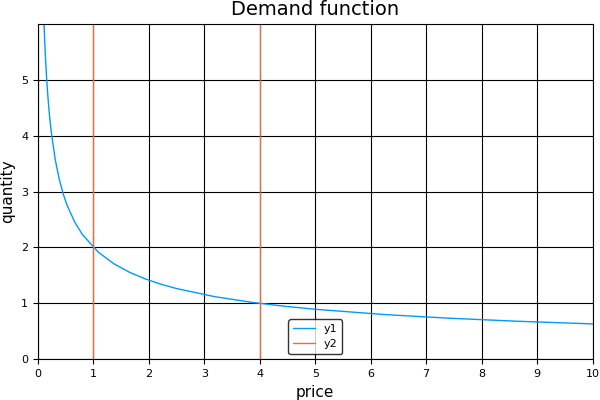

sys:1: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


In [1]:
using Plots
pyplot()
q(p) = 2 * 1/(p^(0.5))
plot(q, 0, 25)
plot!(title = "Demand function", xlabel = "price", ylabel = "quantity")
plot!(xlims = (0, 10), ylims = (0, 6), xticks = 0:1:10, yticks = 0:1:5)
#hline!([q(1),q(4)], line=(:red))
vline!([1,4]) # vertical lines seem more intuitive to me because the surplus is below the curve and to the RIGHT
                # of the price line, not ABOVE the quantity line (otherwise the surplus decreases when price decreases, 
                # which doesn't make sense in economics intuition)

# Analytical solution

Consumer surplus in this graph ($CS$) is the area below the demand curve and to the right of the vertical line indicating the price level: $$CS = \int_{p}^{p_{max}} q(p)dp. $$ Here, $$ CS_1 = \int_{4}^{\infty} q(p)dp $$ $$ CS_2= \int_{1}^{\infty} q(p)dp $$  And the change in consumer's surplus is: $$ \Delta CS = CS_2 - CS_1 =  \int_{1}^{\infty} q(p)dp - \int_{4}^{\infty} q(p)dp = \int_{1}^{4} q(p)dp = \int_{1}^{4} 2p^{-0.5} dp = [4p^{0.5}]_{1}^{4} = 4*(4^{0.5} - 1^{0.5}) = 4. $$ 